In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
from xgboost import XGBRFRegressor 
from sklearn import metrics 

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.shape

(8523, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [11]:
mode_of_outlet_size = df.pivot_table(values='Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x:x.mode()[0]))

In [12]:
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [13]:
missing_values = df['Outlet_Size'].isnull()

In [14]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [15]:
df.loc[missing_values, 'Outlet_Size'] = df.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size)

In [16]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [18]:
sns.set()

<Figure size 600x600 with 0 Axes>

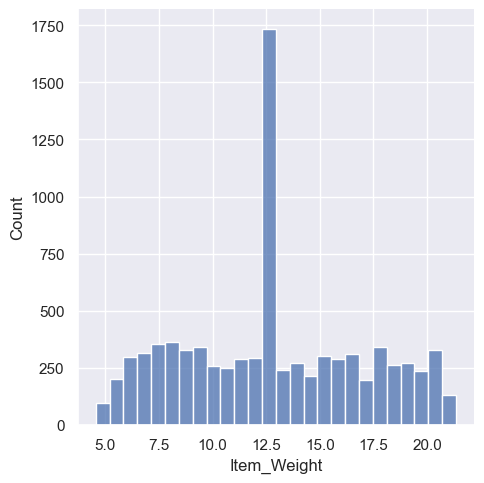

In [19]:
plt.figure(figsize=(6,6))
sns.displot(df['Item_Weight'])
plt.show()

<Figure size 600x600 with 0 Axes>

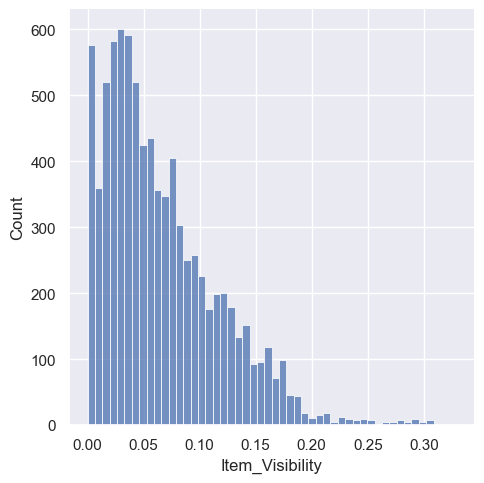

In [20]:
plt.figure(figsize=(6,6))
sns.displot(df['Item_Visibility'])
plt.show()

<Figure size 600x600 with 0 Axes>

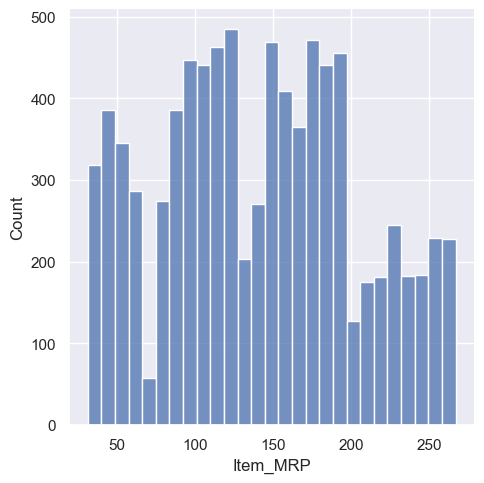

In [21]:
plt.figure(figsize=(6,6))
sns.displot(df['Item_MRP'])
plt.show()

<Figure size 600x600 with 0 Axes>

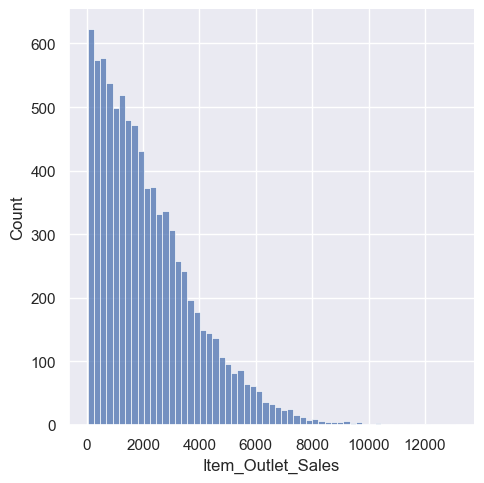

In [23]:
plt.figure(figsize=(6,6))
sns.displot(df['Item_Outlet_Sales'])
plt.show()

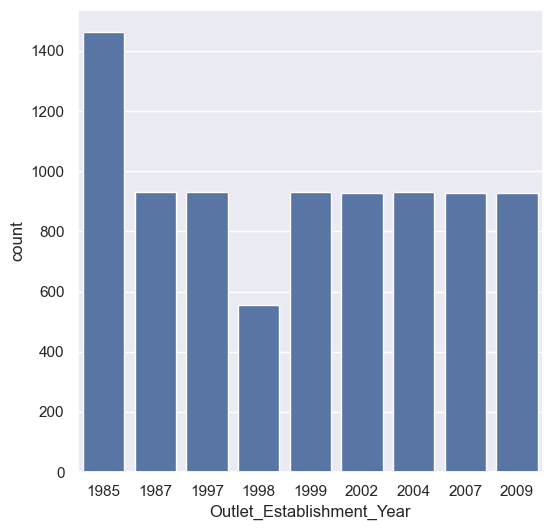

In [25]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.show()

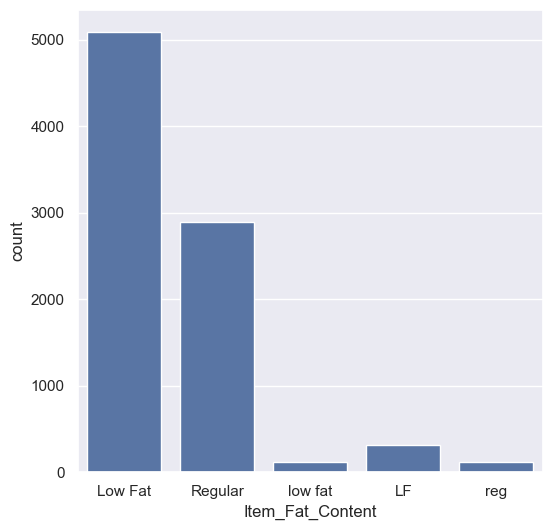

In [30]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=df)
plt.show()

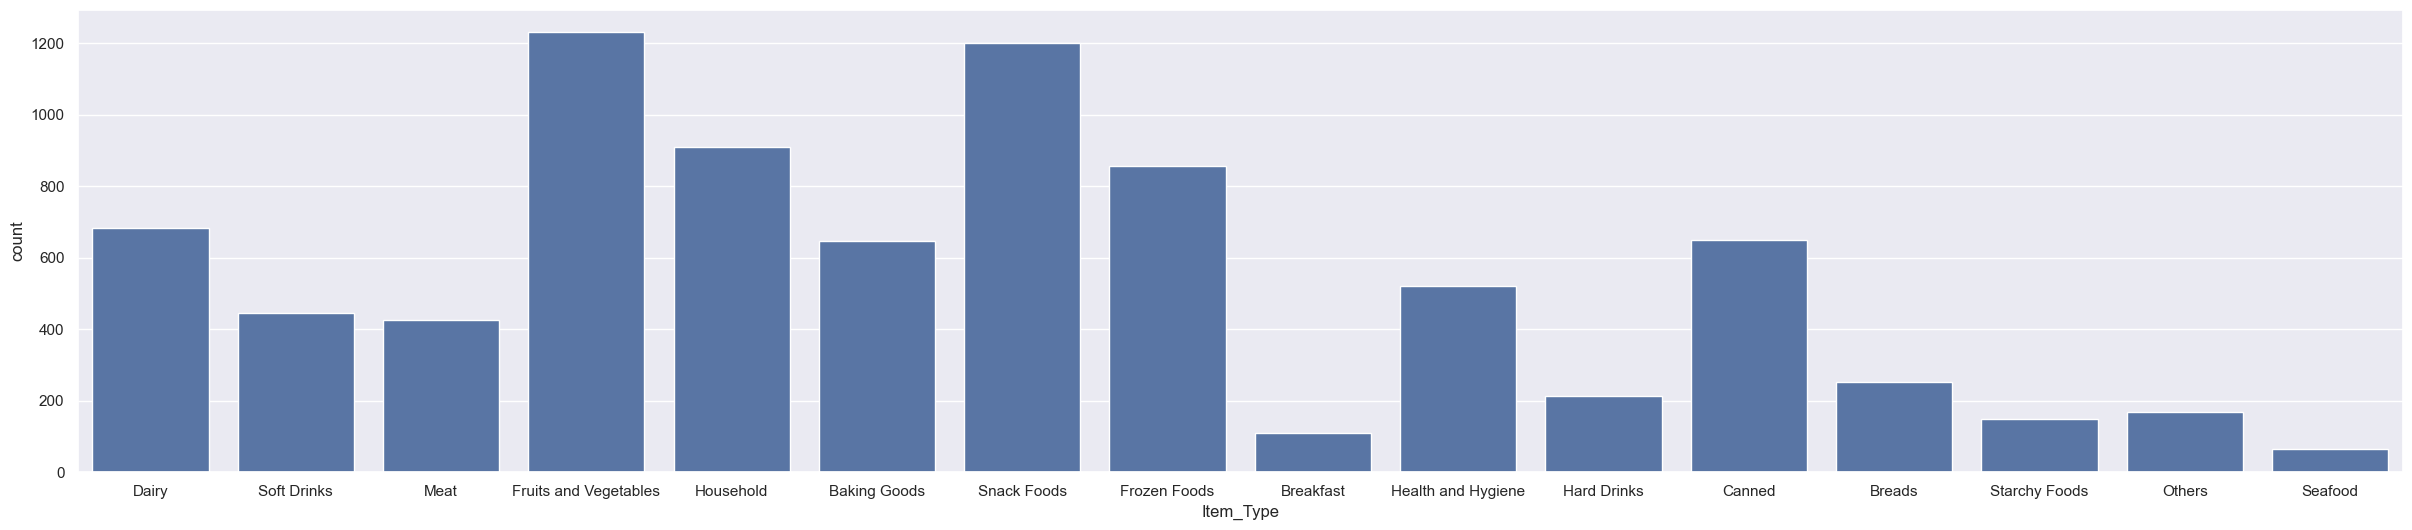

In [31]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=df)
plt.show()

In [35]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [36]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [37]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [38]:
encoder = LabelEncoder()

In [39]:
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])


In [42]:
df['Item_Fat_Content'] = LabelEncoder().fit_transform(df['Item_Fat_Content'].astype(str))
df['Item_Type'] = LabelEncoder().fit_transform(df['Item_Type'].astype(str))
df['Outlet_Identifier'] = LabelEncoder().fit_transform(df['Outlet_Identifier'].astype(str))
df['Outlet_Size'] = LabelEncoder().fit_transform(df['Outlet_Size'].astype(str))
df['Outlet_Location_Type'] = LabelEncoder().fit_transform(df['Outlet_Location_Type'].astype(str))
df['Outlet_Type'] = LabelEncoder().fit_transform(df['Outlet_Type'].astype(str))

In [43]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,10,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,6,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,2,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,12,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,15,53.8614,1,1987,0,2,1,994.7052


In [44]:
X = df.drop(columns='Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

In [45]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,10,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,6,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,2,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,12,182.0950,0,1998,2,2,0
4,1297,8.930,0,0.000000,15,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,5,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,0,0.035186,14,85.1224,6,2004,3,1,1
8521,681,7.210,1,0.145221,5,103.1332,3,2009,1,2,2


In [46]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [50]:
regressor = XGBRFRegressor()

In [51]:
regressor.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, feature_weights=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, ...)

In [52]:
training_data_prediction = regressor.predict(X_train)

In [53]:
r2_train = metrics.r2_score(y_train, training_data_prediction)

In [54]:
r2_train

0.6246136958437367

In [55]:
test_data_prediction = regressor.predict(X_test)

In [56]:
r2_test = metrics.r2_score(y_test, test_data_prediction)

In [57]:
r2_test

0.5812279315584056